In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_excel("DS_feature_selection.xlsx")
df.head()

,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,CLOC,...,NLM,NLPM,NOS,TLLOC,TLOC,TNLG,TNLM,TNLPM,TNOS,Refact_Sum
0,2,6,6,140,32,43,35,47,83,107,...,36,32,323,571,756,5,40,36,336,0
1,1,0,0,4,3,1,1,1,5,32,...,4,4,4,18,49,0,4,4,4,0
2,1,2,2,45,5,1,0,5,15,116,...,10,5,106,233,420,7,13,8,123,0
3,1,2,2,7,1,1,2,1,5,4,...,4,4,19,41,45,1,4,4,19,0
4,3,3,3,38,3,9,16,0,22,48,...,22,22,61,136,199,2,22,22,61,0


In [6]:
X = df.drop(columns=['Refact_Sum'])
y = df['Refact_Sum']

In [7]:
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
from collections import Counter

In [10]:
print("number of of classes before SMote : {}".format(Counter(y)))
print("number of of classes before SMote : {}".format(Counter(y_resampled)))

number of of classes before SMote : Counter({0: 4678, 1: 75})
number of of classes before SMote : Counter({0: 4678, 1: 4678})


In [11]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Refact_Sum'] = y_resampled


In [20]:
resampled_df.shape

(9356, 25)

In [ ]:
resampled_df.head()

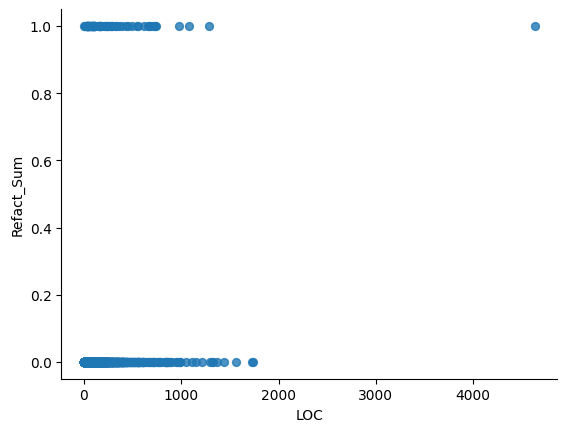

In [28]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='LOC', y='Refact_Sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

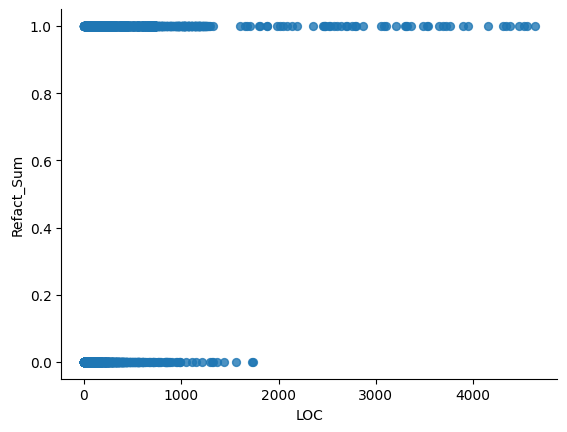

In [29]:
from matplotlib import pyplot as plt
resampled_df.plot(kind='scatter', x='LOC', y='Refact_Sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_countplot(feature):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature)
    plt.title('Countplot of {}'.format(feature.name))
    plt.xlabel(feature.name)
    plt.ylabel('Count')
    plt.show()

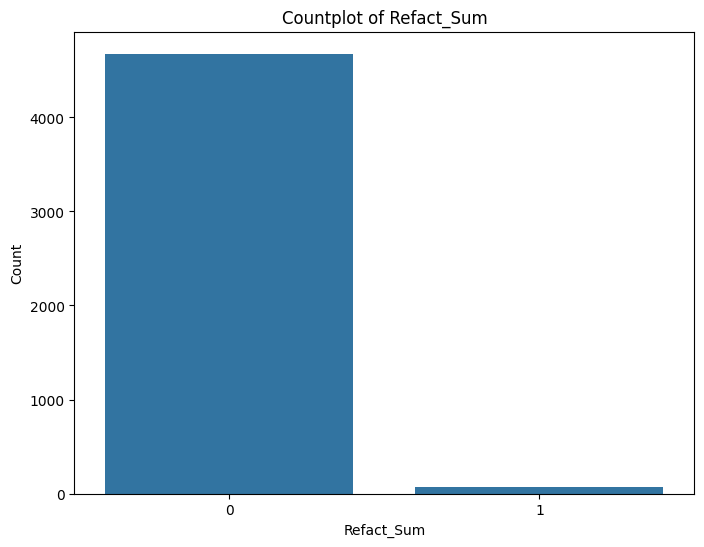

In [22]:
plot_countplot(df['Refact_Sum'])

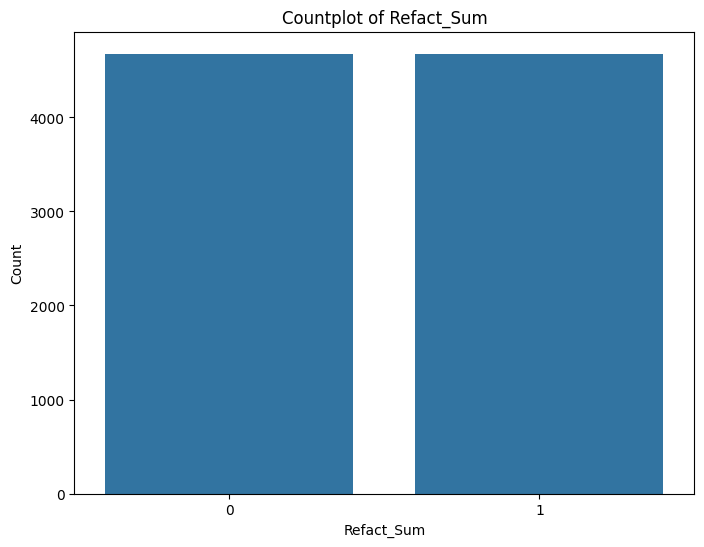

In [23]:
plot_countplot(resampled_df['Refact_Sum'])

In [33]:
resampled_df.to_excel('Data_after_Smote.xlsx', index=False)